# Obtaining Data from Google Drive

Importing all the dependencies and libaries and mounting google drive

In [ ]:
import os, sys
import _pickle as pickle
from keras.utils import np_utils
import numpy as np
import glob
import random
!pip install efficientnet
from google.colab import drive
# mounting google drive
drive.mount('/content/here',force_remount=True)


Unzipping all the dataset from google drive


In [ ]:
!unzip /content/here/MyDrive/data.zip
!unzip /content/here/MyDrive/HDCamera.zip
!unzip /content/here/MyDrive/cross_val.zip

# **Cross validation**


*   Take folders that is unzip from Cross_Val.zip and splitting them into 5 different folds for cross validation




In [ ]:
import os
import random
import shutil
# for google colab
# "\\" == "/" different type of path 
def create_folder_2(location):
    list = ["train_1","train_2","train_3","train_4","train_5"]
    for j in range(5):
        for i in range(41):
            if not os.path.exists(location + "/" + "/" + list[j] + "/X" + str(i + 1)):
                os.makedirs(location + "/" + "/" + list[j] + "/X" + str(i + 1))
def create_proper_data(location):
    list_fold = ["fold1","fold2","fold3","fold4","fold5"]
    list = ["train_1","train_2","train_3","train_4","train_5"]
    counter = 0
    for i in list:
        #final=location+"\\"+i
        counter += 1
        for j in range(5):
            if(j+1) == counter :
                print("val")
            else:
                for root, _, files in os.walk(location+"/"+list_fold[j]):
                    print(os.path.basename(root))
                    #print(root)
                    final = root.replace(list_fold[j],i)
                    #print(final)
                    for file in files:
                        #print(file)
                        shutil.copyfile(root+"/"+file, final+"/"+file)  
  
create_folder_2("/content/cross_val")     #creating folder for the cross_val dataset
create_proper_data("/content/cross_val")  # dividing them to respective folders   

*   imported some functions from keras 
*   using a for loop to do cross validation with 5 different folds





Found 14891 images belonging to 41 classes.
Found 3690 images belonging to 41 classes.
Found 3337 images belonging to 41 classes.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 11, 8, 1280)       4049571   
_________________________________________________________________
flatten_4 (Flatten)          (None, 112640)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 41)                4618281   
Total params: 8,667,852
Trainable params: 8,625,829
Non-trainable params: 42,023
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
232/232 [==============================] - 288s 1s/step - loss: 2.3761 - accuracy: 0.4251 - val_loss: 0.5388 - val_accuracy: 0.8627
Epoch 2/10
232/232 [==============================] - 283s 1s/step - loss: 0.2199 - accuracy: 0.9594 - val_loss: 0.1129 - val_accuracy: 0.9767
Epoch 3/10
232/232 [==============================] - 263s 1s/step - loss: 0.0738 - accuracy: 0.9915 - val_loss: 0.0613 - val_accuracy: 0.9896
Epoch 4/10
232/232 [==============================] - 283s 1s/step - loss: 0.0371 - accuracy: 0.9972 - val_loss: 0.0444 - val_accuracy: 0.9904
Epoch 5/10
232/232 [==============================] - 283s 1s/step - loss: 0.0213 - accuracy: 0.9991 - val_loss: 0.0330 - val_accuracy: 0.9934
Epoch 6/10
232/232 [==============================] - 264s 1s/step - loss: 0.0158 - accuracy: 0.9996 - val_loss: 0.0255 - val_accuracy: 0.9940
Epoch 7/10
232/232 [==============================] - 263s 1s/step - loss: 0.0112 - accuracy: 0.9996 - val_loss: 0.0206 - val_accuracy: 0.9953

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


3337/3337 [==============================] - 54s 15ms/step
Total Accuracy For Test: 99.75735290782465 %


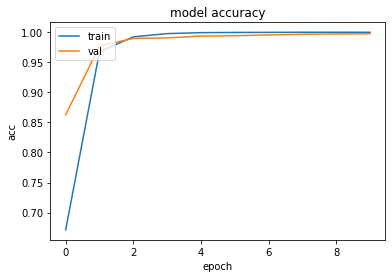

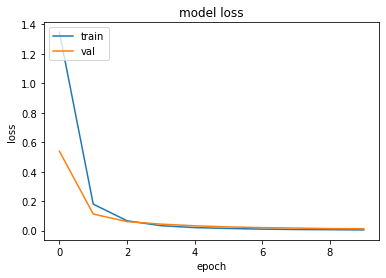

[99.75735290782465]


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.efficientnet import preprocess_input
import numpy as np 
from keras.applications.efficientnet import EfficientNetB0 , EfficientNetB7
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Flatten,Dropout ,GlobalAveragePooling2D , MaxPool2D
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
train = ["train_1","train_2","train_3","train_4","train_5"]
list_fold = ["fold1","fold2","fold3","fold4","fold5"]
accuracy = list()
for i in range(5):
  from keras.preprocessing.image import ImageDataGenerator


  train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input

  ) # set validation split
  val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input

  )
  test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input

  )

  train_generator = train_datagen.flow_from_directory(
      directory=r"/content/cross_val/"+train[i],
      target_size=(341, 256),
      color_mode="rgb",
      batch_size=64,
      class_mode="categorical",

  )
  validation_generator = val_datagen.flow_from_directory(
      directory=r"/content/cross_val/"+list_fold[i],
      target_size=(341, 256),
      color_mode="rgb",
      batch_size=64,
      class_mode="categorical") # set as validation data

  test_generator = test_datagen.flow_from_directory(
      directory=r"/content/cross_val/test",
      target_size=(341, 256),
      color_mode="rgb",
      batch_size=1,
      class_mode="categorical",
      shuffle=False # to evaluate dataset easier
  )
  labels = (train_generator.class_indices)
  labels = dict((v,k) for k,v in labels.items())
  labels_test = (test_generator.class_indices)
  labels_test = dict((v,k) for k,v in labels_test.items())
  # print(labels)
  # print(labels_test)
  model = Sequential()
  model.add(EfficientNetB0(include_top=False, weights="imagenet", classes=41,input_shape=(341,256,3)))
  model.add(Flatten())
  model.add(Dense(41, activation='softmax'))
  optimizer = Adam(learning_rate=1e-5)
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  model.summary()
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
  STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
  STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size


  #train
  hist = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10,
                    callbacks=[es]
  )
  

  test_generator.reset()
  pred=model.predict_generator(test_generator,verbose=1)
  predicted_class_indices=np.argmax(pred,axis=1)
  predictions = [labels[k] for k in predicted_class_indices]
  test = [labels_test[k] for k in test_generator.classes]
  check = []
  total = []
  for i in range(len(labels)):
      check.append(0)
      total.append(0)
  for i in range(len(test_generator.classes)):
    total[test_generator.classes[i]]+=1
    if (predicted_class_indices[i]!=test_generator.classes[i]):
          check[test_generator.classes[i]]+=1

  total_s = 0
  for i in range(len(check)):
    total_s+=((total[i]-check[i])/total[i])*100
  print("Total Accuracy For Test:",total_s/len(check),"%")
  accuracy.append(total_s/len(check)) #append result after each run
  import matplotlib.pyplot as plt


  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('acc')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
print(accuracy) # printing the accuracy of 5-fold cross validation

# Model 



*   Using split-folders to split dataset to 70% training, 15% validation, 15% test
*   seed= 1337 to prevent different partitioning



In [ ]:
!pip install split-folders tqdm

import splitfolders
splitfolders.ratio("/content/data",output="/content/output",seed=1337,ratio=(.70,.15,.15), group_prefix=None)

Copying files: 21958 files [00:45, 479.03 files/s]




*   Preprocessing of dataset
*   Data Augmentation





Found 15319 images belonging to 41 classes.
Found 3268 images belonging to 41 classes.
Found 3331 images belonging to 41 classes.
{0: 'X1', 1: 'X10', 2: 'X11', 3: 'X12', 4: 'X13', 5: 'X14', 6: 'X15', 7: 'X16', 8: 'X17', 9: 'X18', 10: 'X19', 11: 'X2', 12: 'X20', 13: 'X21', 14: 'X22', 15: 'X23', 16: 'X24', 17: 'X25', 18: 'X26', 19: 'X27', 20: 'X28', 21: 'X29', 22: 'X3', 23: 'X30', 24: 'X31', 25: 'X32', 26: 'X33', 27: 'X34', 28: 'X35', 29: 'X36', 30: 'X37', 31: 'X38', 32: 'X39', 33: 'X4', 34: 'X40', 35: 'X41', 36: 'X5', 37: 'X6', 38: 'X7', 39: 'X8', 40: 'X9'}
{0: 'X1', 1: 'X10', 2: 'X11', 3: 'X12', 4: 'X13', 5: 'X14', 6: 'X15', 7: 'X16', 8: 'X17', 9: 'X18', 10: 'X19', 11: 'X2', 12: 'X20', 13: 'X21', 14: 'X22', 15: 'X23', 16: 'X24', 17: 'X25', 18: 'X26', 19: 'X27', 20: 'X28', 21: 'X29', 22: 'X3', 23: 'X30', 24: 'X31', 25: 'X32', 26: 'X33', 27: 'X34', 28: 'X35', 29: 'X36', 30: 'X37', 31: 'X38', 32: 'X39', 33: 'X4', 34: 'X40', 35: 'X41', 36: 'X5', 37: 'X6', 38: 'X7', 39: 'X8', 40: 'X9'}
<cla

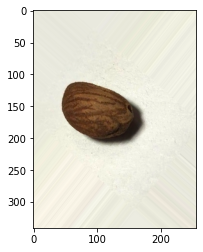

(64, 341, 256, 3)


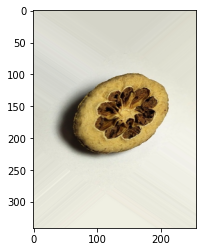

(64, 341, 256, 3)


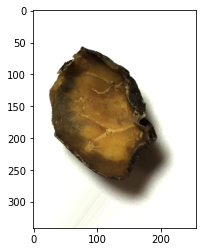

(64, 341, 256, 3)


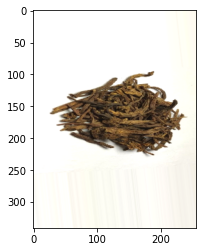

(64, 341, 256, 3)


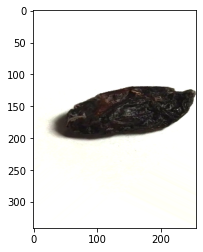

(64, 341, 256, 3)


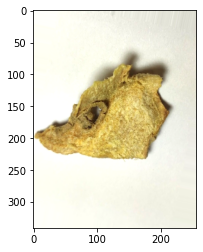

(64, 341, 256, 3)


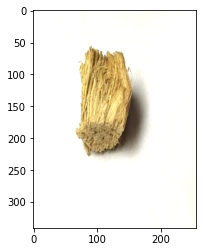

(64, 341, 256, 3)


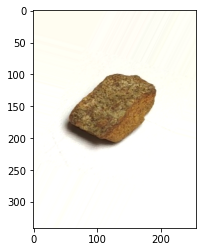

(64, 341, 256, 3)


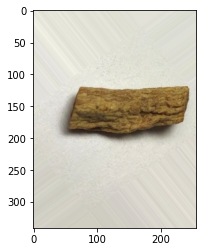

(64, 341, 256, 3)


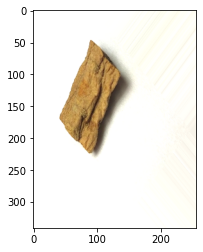

(64, 341, 256, 3)


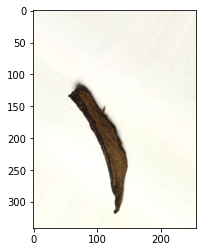

(64, 341, 256, 3)


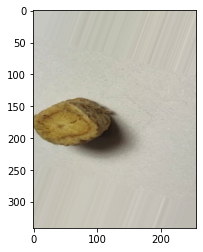

(64, 341, 256, 3)


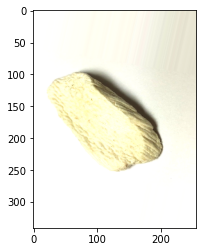

(64, 341, 256, 3)


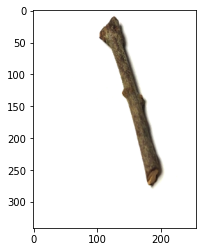

(64, 341, 256, 3)


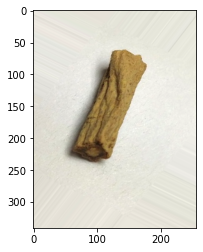

(64, 341, 256, 3)


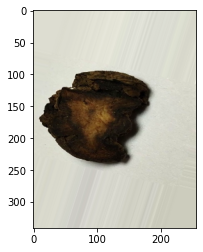

(64, 341, 256, 3)


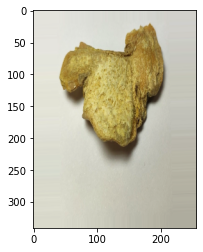

(64, 341, 256, 3)


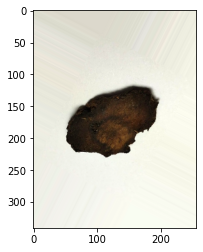

(64, 341, 256, 3)


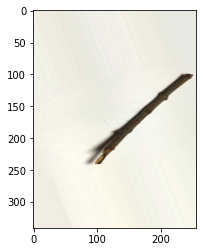

(64, 341, 256, 3)


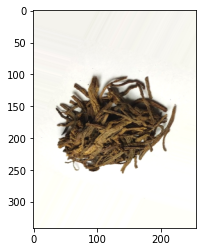

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.efficientnet import preprocess_input
import matplotlib.pyplot as plt


train_datagen = ImageDataGenerator( #data augmentation happens here
    rotation_range=90,
    fill_mode='nearest',
    shear_range=0.5,
    brightness_range=[0.8,1.0],
    zoom_range=[1.0,1.8],
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
) # set validation split
val_datagen = ImageDataGenerator(
    rotation_range=90,
    fill_mode='nearest',
    shear_range=0.5,
    brightness_range=[0.8,1.0],
    zoom_range=[1.0,1.8],
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
) 
test_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input

)

train_generator = train_datagen.flow_from_directory(
    directory=r"/content/output/train",
    target_size=(341,256),
    color_mode="rgb",
    batch_size=64,
    class_mode="categorical",
    
)
validation_generator = val_datagen.flow_from_directory(
    directory=r"/content/output/val",
    target_size=(341,256),
    color_mode="rgb",
    batch_size=64,
    class_mode="categorical",
    ) # set as validation data

test_generator = test_datagen.flow_from_directory(
    directory=r"/content/output/test",
    target_size=(341,256),
    color_mode="rgb",
    batch_size=1,
    class_mode="categorical",
    shuffle = False
)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels_test = (test_generator.class_indices)
labels_test = dict((v,k) for k,v in labels_test.items())
print(labels)
print(labels_test)
print(type(validation_generator))
print(type(test_generator))


In [ ]:
import numpy as np 
from keras.applications.efficientnet import EfficientNetB0 , EfficientNetB7
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Flatten,Dropout ,GlobalAveragePooling2D , MaxPool2D
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
#standardizes the inputs to a layer for each mini-batch. 
#This has the effect of stabilizing the learning process 
#and dramatically reducing the number of training epochs required to train deep networks
model = Sequential()
#model.add(MobileNetV2(weights='imagenet', include_top=False,classes = 4,input_shape=(224,224,3)))
model.add(EfficientNetB0(include_top=False, weights="imagenet", classes=41,input_shape=(341,256,3)))
model.add(Flatten())
model.add(Dense(41, activation='softmax'))


optimizer = Adam(learning_rate=1e-5)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size


16719872/16705208 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 11, 8, 1280)       4049571   
_________________________________________________________________
flatten (Flatten)            (None, 112640)            0         
_________________________________________________________________
dense (Dense)                (None, 41)                4618281   
Total params: 8,667,852
Trainable params: 8,625,829
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:

hist = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=30,
                    callbacks=[es]
)
# training accuracy might be low due to dropout function

Epoch 1/30
239/239 [==============================] - 585s 2s/step - loss: 3.0619 - accuracy: 0.2544 - val_loss: 1.1130 - val_accuracy: 0.6713
Epoch 2/30
239/239 [==============================] - 515s 2s/step - loss: 0.8506 - accuracy: 0.7635 - val_loss: 0.4221 - val_accuracy: 0.8781
Epoch 3/30
239/239 [==============================] - 516s 2s/step - loss: 0.4435 - accuracy: 0.8678 - val_loss: 0.2487 - val_accuracy: 0.9228
Epoch 4/30
239/239 [==============================] - 522s 2s/step - loss: 0.2885 - accuracy: 0.9156 - val_loss: 0.1752 - val_accuracy: 0.9442
Epoch 5/30
239/239 [==============================] - 513s 2s/step - loss: 0.2006 - accuracy: 0.9414 - val_loss: 0.1163 - val_accuracy: 0.9648
Epoch 6/30
239/239 [==============================] - 511s 2s/step - loss: 0.1551 - accuracy: 0.9548 - val_loss: 0.0924 - val_accuracy: 0.9721
Epoch 7/30
239/239 [==============================] - 508s 2s/step - loss: 0.1169 - accuracy: 0.9623 - val_loss: 0.0735 - val_accuracy: 0.9776

# Load Model for Testing

In [ ]:
from keras.models import load_model

# can load previous model to do any evaluation
from google.colab import drive
drive.mount('/content/gdrive')
model=load_model("/content/gdrive/MyDrive/TCM/9_5.h5")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).




#    Evaluation of Model





*   Plotting the model train/validation accuracy

*   Plotting the model train/validation loss





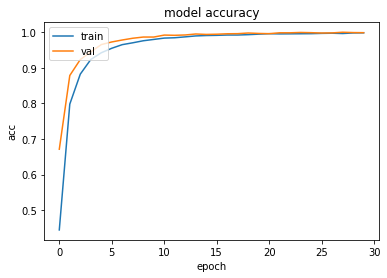

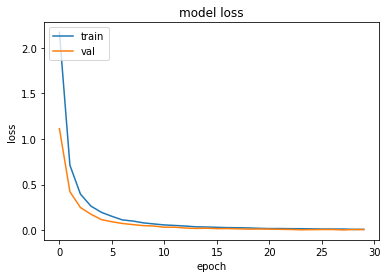

In [ ]:
import matplotlib.pyplot as plt


plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Confusion Matrix/ Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(pred, axis=1)
list_class = [ 'X1',  'X10',  'X11', 'X12',  'X13',  'X14',  'X15',  'X16',  'X17',  'X18',  'X19',  'X2',  'X20',  'X21',  'X22',  'X23',  'X24',  'X25',  'X26',  'X27',  'X28',  'X29',  'X3',  'X30',  'X31',  'X32', 'X33',  'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X4','X40', 'X41', 'X5', 'X6', 'X7', 'X8', 'X9']

confusion = confusion_matrix(test_generator.classes, y_pred)
print(len(test_generator.classes))
print(classification_report(test_generator.classes, y_pred, target_names=list_class))


3331
              precision    recall  f1-score   support

          X1       1.00      0.91      0.96        82
         X10       0.97      0.96      0.97        81
         X11       1.00      1.00      1.00        70
         X12       0.99      0.99      0.99        82
         X13       0.95      0.94      0.94        82
         X14       1.00      1.00      1.00        82
         X15       1.00      1.00      1.00        82
         X16       1.00      1.00      1.00        82
         X17       1.00      1.00      1.00        82
         X18       0.99      1.00      0.99        81
         X19       1.00      1.00      1.00        81
          X2       0.99      0.99      0.99        82
         X20       1.00      1.00      1.00        82
         X21       1.00      0.99      0.99        81
         X22       1.00      1.00      1.00        81
         X23       0.99      1.00      0.99        82
         X24       1.00      1.00      1.00        81
         X25       1.0

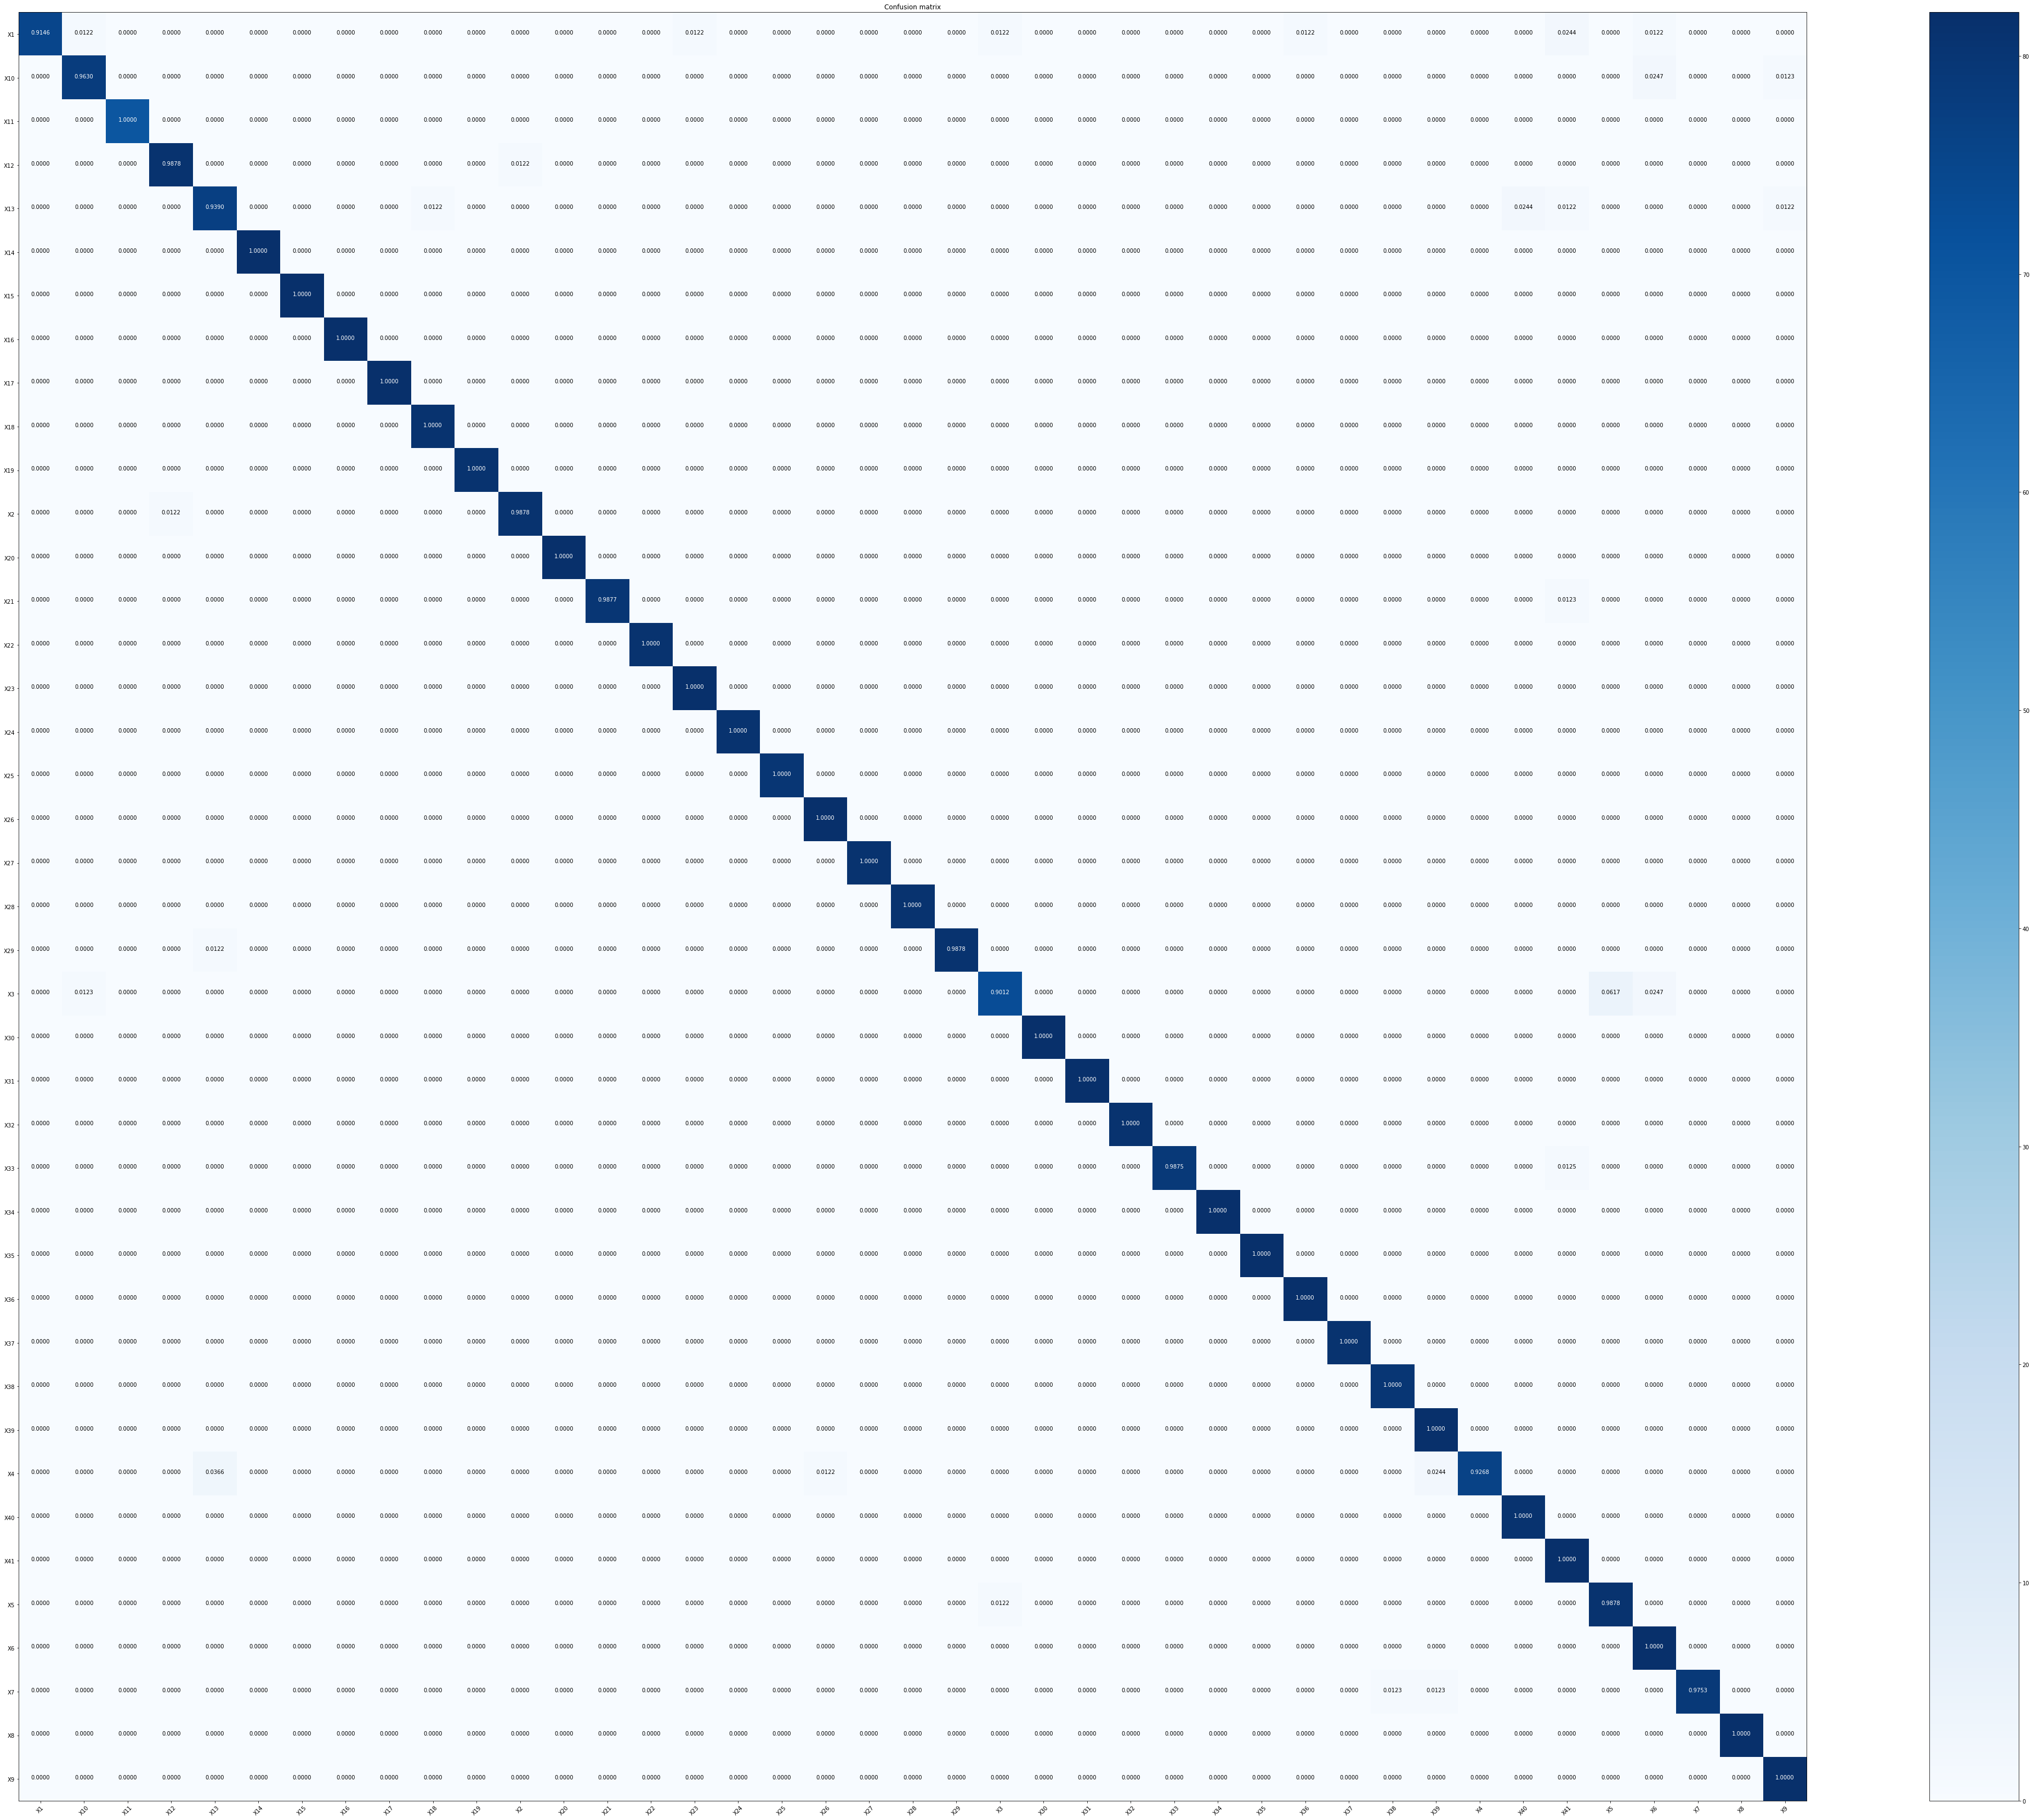

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(80, 60))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
plot_confusion_matrix(confusion, list_class)

# Accuracy Check

In [ ]:
import numpy as np


test_generator.reset()
pred=model.predict_generator(test_generator,verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)
predictions = [labels[k] for k in predicted_class_indices]
test = [labels_test[k] for k in test_generator.classes]
check = []
total = []
for i in range(len(labels)):
    check.append(0)
    total.append(0)
for i in range(len(test_generator.classes)):
  total[test_generator.classes[i]]+=1
  if (predicted_class_indices[i]!=test_generator.classes[i]):
        check[test_generator.classes[i]]+=1



/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


3331/3331 [==============================] - 53s 14ms/step


In [ ]:
total_s = 0
for i in range(len(check)):
  print(labels[i])
  print("wrong predictions: ",check[i],"/",total[i])
  print("Accuracy:",((total[i]-check[i])/total[i])*100,"%")
  total_s+=((total[i]-check[i])/total[i])*100
print("Total Accuracy For Test:",total_s/len(check),"%")

X1
wrong predictions:  7 / 82
Accuracy: 91.46341463414635 %
X10
wrong predictions:  3 / 81
Accuracy: 96.29629629629629 %
X11
wrong predictions:  0 / 70
Accuracy: 100.0 %
X12
wrong predictions:  1 / 82
Accuracy: 98.78048780487805 %
X13
wrong predictions:  5 / 82
Accuracy: 93.90243902439023 %
X14
wrong predictions:  0 / 82
Accuracy: 100.0 %
X15
wrong predictions:  0 / 82
Accuracy: 100.0 %
X16
wrong predictions:  0 / 82
Accuracy: 100.0 %
X17
wrong predictions:  0 / 82
Accuracy: 100.0 %
X18
wrong predictions:  0 / 81
Accuracy: 100.0 %
X19
wrong predictions:  0 / 81
Accuracy: 100.0 %
X2
wrong predictions:  1 / 82
Accuracy: 98.78048780487805 %
X20
wrong predictions:  0 / 82
Accuracy: 100.0 %
X21
wrong predictions:  1 / 81
Accuracy: 98.76543209876543 %
X22
wrong predictions:  0 / 81
Accuracy: 100.0 %
X23
wrong predictions:  0 / 82
Accuracy: 100.0 %
X24
wrong predictions:  0 / 81
Accuracy: 100.0 %
X25
wrong predictions:  0 / 80
Accuracy: 100.0 %
X26
wrong predictions:  0 / 82
Accuracy: 100.0 %

# Model Saving



*   Saving the model to Google Drivs



In [ ]:

model.save("/content/here/MyDrive/341_256_6_27_Bright_hor_vert_shear_added_TCM.h5") # to allow us to run on the server

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
